# import required packages

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download the dataset from the internet

In [3]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.data.shape

torch.Size([60000, 28, 28])

# .shape is same as .size()

In [7]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [8]:
train_data.targets.size()

torch.Size([60000])

# Data loader

In [9]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1),
    'test' : DataLoader(test_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1)
}

In [10]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7cda135506e0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7cda13528690>}

# Create our neural network

`self.conv1 = nn.Conv2d(1, 10, kernel_size=5)`

is defining a convolutional layer in a PyTorch neural network. Specifically:

nn.Conv2d is a 2D convolutional layer used primarily for processing image data.

The first argument 1 is the number of input channels. For example, if the input is a grayscale image, it has 1 channel.

The second argument 10 is the number of output channels, meaning this layer will learn 10 different filters (or feature detectors).

kernel_size=5 means each filter is a 5x5 square that will slide over the input image to detect features.

`self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        `
        
self.conv2_drop = nn.Dropout2d()
This creates a 2D dropout layer, which randomly zeroes entire channels in the feature map during training to reduce overfitting.

self.fc1 = nn.Linear(320, 50)
This defines a fully connected (linear) layer with 320 input features and 50 output features (neurons).

self.fc2 = nn.Linear(50, 10)
This defines another fully connected layer taking the 50 features from the previous layer as input and outputting 10 features, often used as class scores for a 10-class classification.



In [11]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

    def __init__(self):
        super(CNN,self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)        
        

In [12]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f}")

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders["test"]:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')


In [ ]:
for epoch in range(1,11):
    train(epoch)
    test() 

/tmp/ipykernel_10940/3581625747.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.301714
Train Epoch: 1 [2000/60000 (3%)]	2.276603
Train Epoch: 1 [4000/60000 (7%)]	2.126235
Train Epoch: 1 [6000/60000 (10%)]	1.868685
Train Epoch: 1 [8000/60000 (13%)]	1.859537
Train Epoch: 1 [10000/60000 (17%)]	1.760194
Train Epoch: 1 [12000/60000 (20%)]	1.804528
Train Epoch: 1 [14000/60000 (23%)]	1.715340
Train Epoch: 1 [16000/60000 (27%)]	1.696078
Train Epoch: 1 [18000/60000 (30%)]	1.705026
Train Epoch: 1 [20000/60000 (33%)]	1.706696
Train Epoch: 1 [22000/60000 (37%)]	1.699240
Train Epoch: 1 [24000/60000 (40%)]	1.778364
Train Epoch: 1 [26000/60000 (43%)]	1.663630
Train Epoch: 1 [28000/60000 (47%)]	1.649062
Train Epoch: 1 [30000/60000 (50%)]	1.647227
Train Epoch: 1 [32000/60000 (53%)]	1.653231
Train Epoch: 1 [34000/60000 (57%)]	1.653567
Train Epoch: 1 [36000/60000 (60%)]	1.629438
Train Epoch: 1 [38000/60000 (63%)]	1.606007
Train Epoch: 1 [40000/60000 (67%)]	1.648028
Train Epoch: 1 [42000/60000 (70%)]	1.592512
Train Epoch: 1 [44000/60000 (73%)]	1.610797

In [14]:
device

device(type='cpu')

Prediction: 9


/tmp/ipykernel_10940/3581625747.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


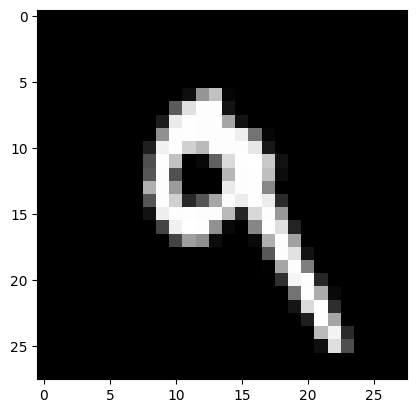

In [26]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[7]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()